#                    **Laboratorio I**
## Text Mining

### Problema I

In [1]:
from PIL import Image

def activar_canales(imagen, color):
    imagen = imagen.convert("RGB")
    # Obtener los datos de la imagen
    datos = imagen.load()

    # Definir los canales
    if color == 1:
        canales = (0, 0, 1)  # Solo azul
    elif color == 2:
        canales = (0, 1, 0)  # Solo verde
    elif color == 3:
        canales = (1, 0, 0)  # Solo rojo
    elif color == 10:
        canales = (1, 0, 1)  # Rojo y verde
    elif color == 20:
        canales = (0, 1, 1)  # Verde y azul
    elif color == 30:
        canales = (1, 1, 0)  # Rojo y azul
    else:
        raise ValueError("Color no válido")

    # Aplicar los canales activos a la imagen
    for x in range(imagen.width):
        for y in range(imagen.height):
            r, g, b = datos[x, y]
            datos[x, y] = (r * canales[0], g * canales[1], b * canales[2])

    return imagen


## Problema II

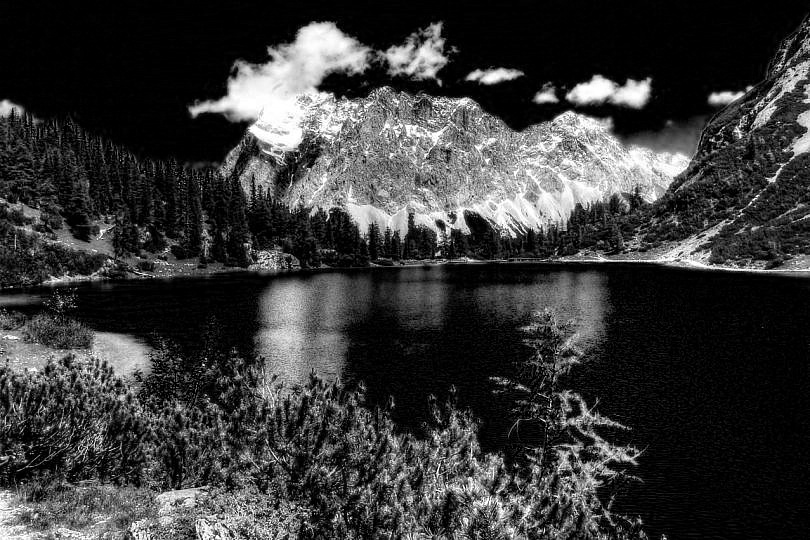

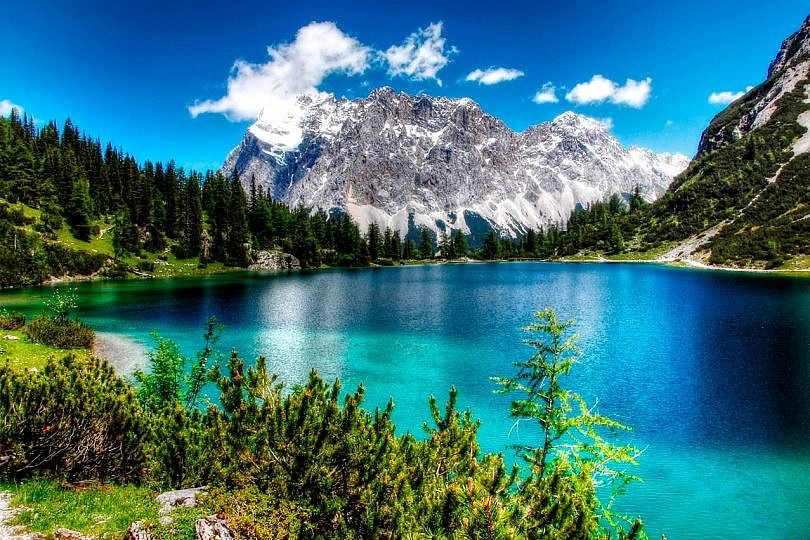

In [5]:
from PIL import Image
import numpy as np

def reconstruir_imagen_color(imagen_rojo, imagen_verde, imagen_azul):
    # Convertir las imágenes a arrays numpy
    rojo = np.array(imagen_rojo)
    verde = np.array(imagen_verde)
    azul = np.array(imagen_azul)

    # Verificar que las dimensiones sean iguales
    if rojo.shape != verde.shape or rojo.shape != azul.shape:
        raise ValueError("Las dimensiones de las imágenes deben ser iguales")

    # Crear una nueva imagen combinando los tres canales
    imagen_color = np.stack((rojo, verde, azul), axis=-1)

    # Convertir el array numpy a imagen PIL
    imagen_color = Image.fromarray(imagen_color.astype('uint8'), 'RGB')

    return imagen_color

# Cargar las imágenes
imagen_rojo = Image.open("/content/imagen1_salida_gray_rojo.jpg").convert("L")
imagen_verde = Image.open("/content/imagen1_salida_gray_verde.jpg").convert("L")
imagen_azul = Image.open("/content/imagen1_salida_gray_azul.jpg").convert("L")

display(imagen_rojo)

# Reconstruir la imagen a color
imagen_color = reconstruir_imagen_color(imagen_rojo, imagen_verde, imagen_azul)

# Now you can display the image
display(imagen_color)

#Problema III

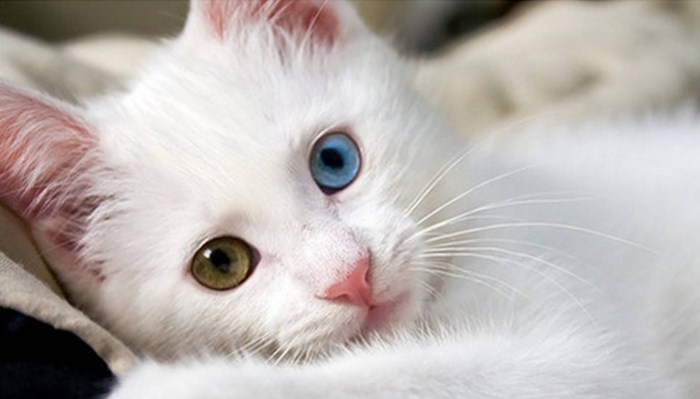

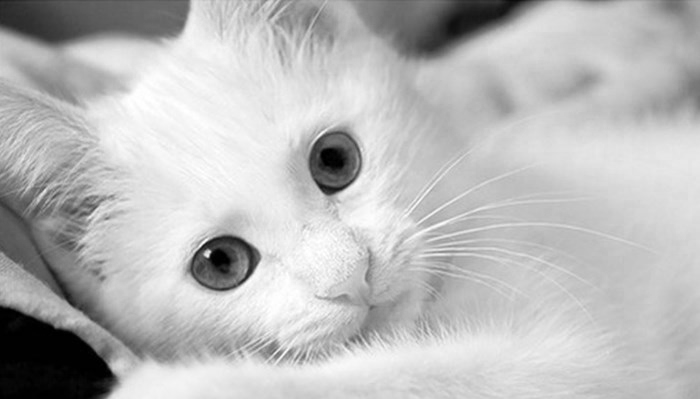

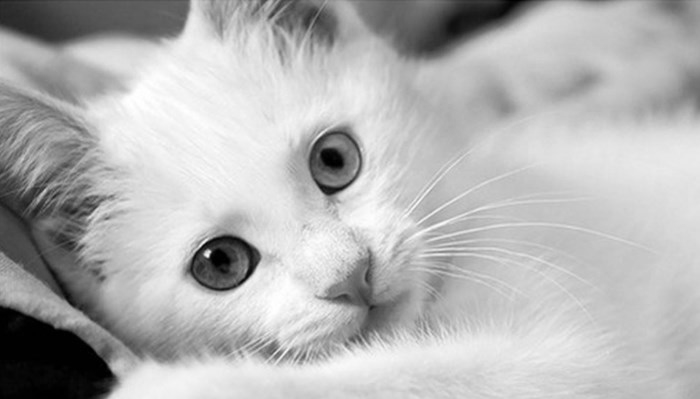

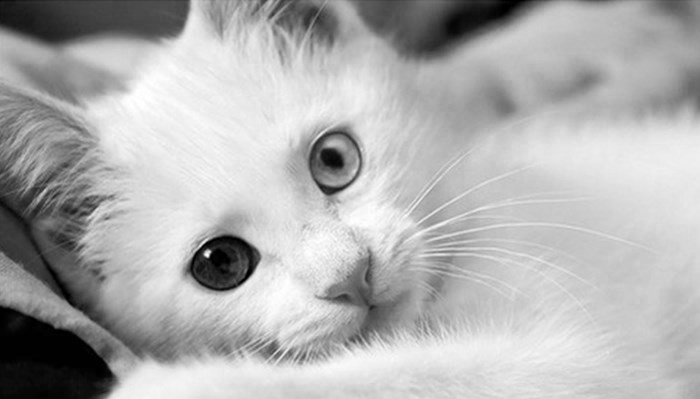

In [10]:
from PIL import Image
import numpy as np
from IPython.display import display

def crear_escala_grises_3d(imagen_color):
    # Convertir la imagen a array numpy
    imagen_array = np.array(imagen_color)

    # Separar los canales de color
    rojo = imagen_array[:, :, 0]
    verde = imagen_array[:, :, 1]
    azul = imagen_array[:, :, 2]

    # Convertir cada canal a imagen en escala de grises
    imagen_rojo = Image.fromarray(rojo)
    imagen_verde = Image.fromarray(verde)
    imagen_azul = Image.fromarray(azul)

    return imagen_rojo, imagen_verde, imagen_azul

# Cargar una nueva imagen a color (no usar la del problema 2)
imagen_color = Image.open("/content/gato-de-angora-5.jpg")
display(imagen_color)
# Crear las imágenes en escala de grises
imagen_rojo, imagen_verde, imagen_azul = crear_escala_grises_3d(imagen_color)

# Visualizar las imágenes resultantes
display(imagen_rojo)
display(imagen_verde)
display(imagen_azul)


## Problema 4

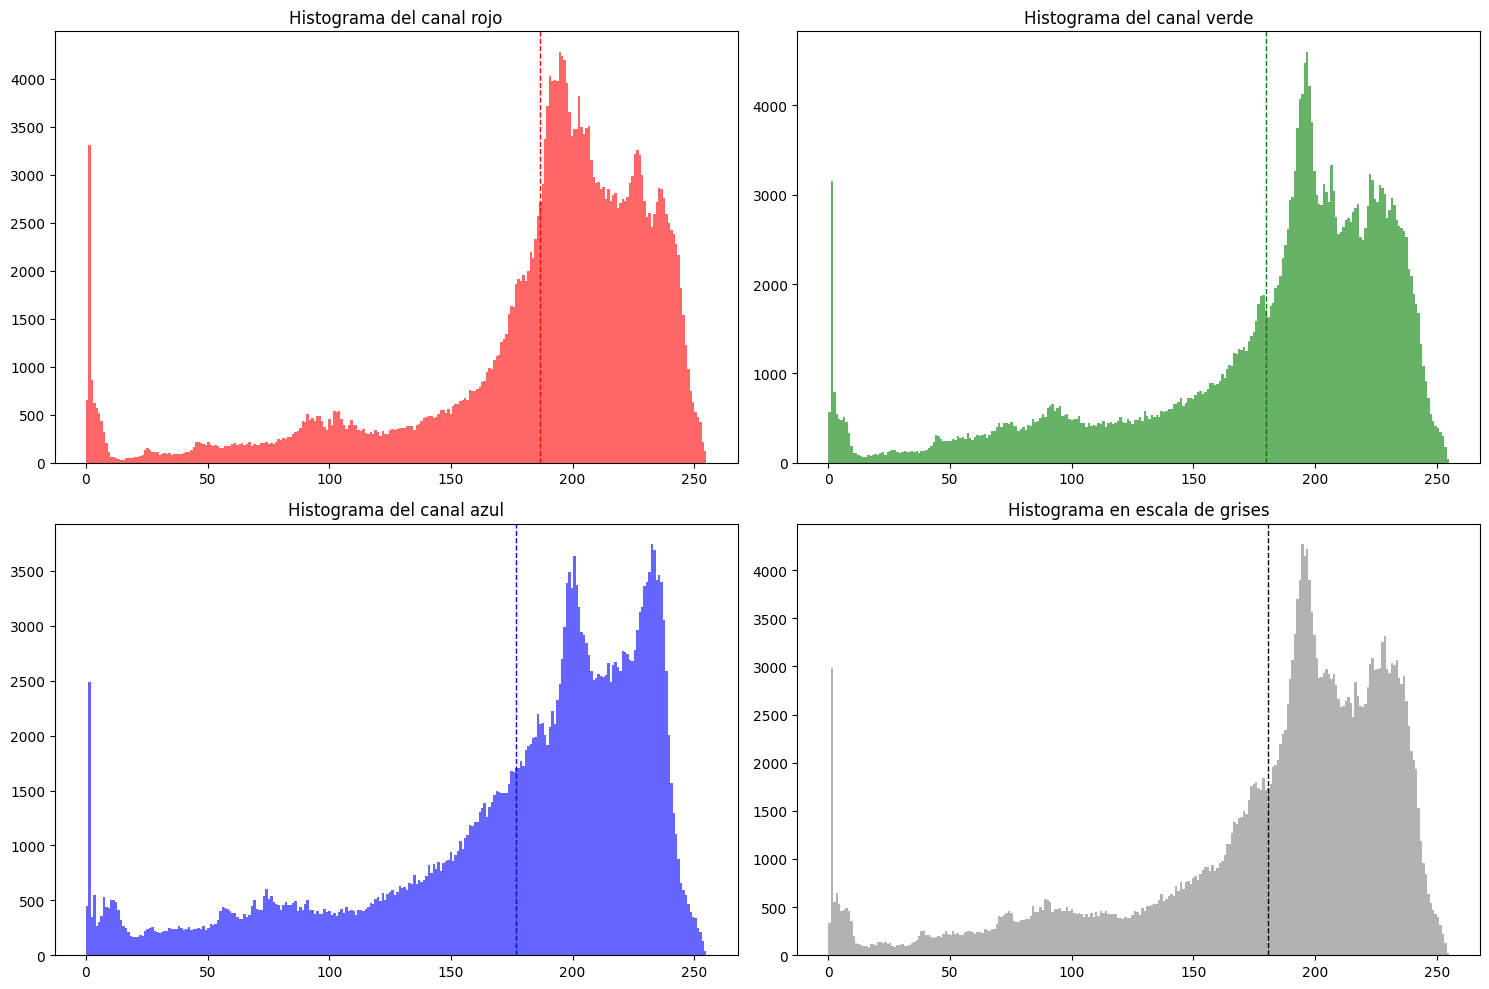

In [14]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def calcular_promedio_aritmetico(imagen_color):
    # Convertir la imagen a array numpy
    imagen_array = np.array(imagen_color)

    # Calcular el promedio aritmético de los canales R, G, B
    gris = np.mean(imagen_array, axis=2)

    # Convertir el array de grises a una imagen PIL
    imagen_gris = Image.fromarray(gris.astype('uint8'), 'L')

    return imagen_gris

def mostrar_histogramas(imagen_color):
    # Convertir la imagen a array numpy
    imagen_array = np.array(imagen_color)

    #canales de color
    rojo = imagen_array[:, :, 0]
    verde = imagen_array[:, :, 1]
    azul = imagen_array[:, :, 2]

    # Calcular la imagen en escala de grises usando el promedio aritmético
    imagen_gris = calcular_promedio_aritmetico(imagen_color)
    gris = np.array(imagen_gris)

    # Crear histogramas para cada canal y la imagen en escala de grises
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    # Histograma del canal rojo
    axs[0, 0].hist(rojo.flatten(), bins=256, color='red', alpha=0.6)
    media_rojo = rojo.mean()
    axs[0, 0].axvline(media_rojo, color='red', linestyle='dashed', linewidth=1)
    axs[0, 0].set_title('Histograma del canal rojo')

    # Histograma del canal verde
    axs[0, 1].hist(verde.flatten(), bins=256, color='green', alpha=0.6)
    media_verde = verde.mean()
    axs[0, 1].axvline(media_verde, color='green', linestyle='dashed', linewidth=1)
    axs[0, 1].set_title('Histograma del canal verde')

    # Histograma del canal azul
    axs[1, 0].hist(azul.flatten(), bins=256, color='blue', alpha=0.6)
    media_azul = azul.mean()
    axs[1, 0].axvline(media_azul, color='blue', linestyle='dashed', linewidth=1)
    axs[1, 0].set_title('Histograma del canal azul')

    # Histograma de la imagen en escala de grises
    axs[1, 1].hist(gris.flatten(), bins=256, color='gray', alpha=0.6)
    media_gris = gris.mean()
    axs[1, 1].axvline(media_gris, color='black', linestyle='dashed', linewidth=1)
    axs[1, 1].set_title('Histograma en escala de grises')

    plt.tight_layout()
    plt.show()

imagen_color = Image.open("/content/gato-de-angora-5.jpg")

# Mostrar los histogramas
mostrar_histogramas(imagen_color)


# Problema 5

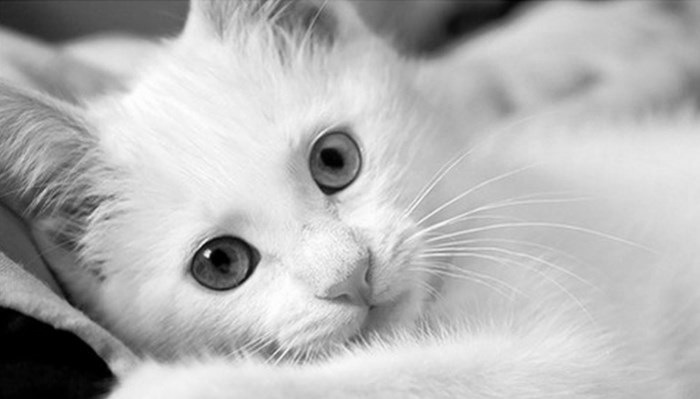

In [11]:
from PIL import Image
import numpy as np
from IPython.display import display

def convertir_a_grises_ponderado(imagen_color):
    # Convertir la imagen a array numpy
    imagen_array = np.array(imagen_color)

    # Aplicar la fórmula ponderada para convertir a escala de grises
    gris = 0.2989 * imagen_array[:, :, 0] + 0.5870 * imagen_array[:, :, 1] + 0.1140 * imagen_array[:, :, 2]

    # Convertir el array de grises a una imagen PIL
    imagen_gris = Image.fromarray(gris.astype('uint8'), 'L')

    return imagen_gris

# Ejemplo de uso
# Cargar una nueva imagen a color
imagen_color = Image.open("/content/gato-de-angora-5.jpg")

# Convertir la imagen a escala de grises ponderada
imagen_gris_ponderada = convertir_a_grises_ponderado(imagen_color)

# Visualizar la imagen en escala de grises ponderada
display(imagen_gris_ponderada)


## Problema 6

**Espacio de Color HSV**

El espacio de color HSV, cuyas sigolas son Hue(Tono), Saturation(Saturación) y Value (Valor), es una manera de representar colores que es más intuitiva para las personas. A diferencia del espacio RGB, el espacio HSV separa la información del color en tres componentes que son más fáciles de entender. Estas componentes son:

Hue (Tono): Es el color propiamente dicho y se mide en grados, de 0 a 360, en un círculo de colores. Por ejemplo, 0 grados es rojo, 120 grados es verde y 240 grados es azul.

Saturation (Saturación): Indica la intensidad o pureza del color. Va de 0 a 100%, donde 0% es un gris sin color y 100% es el color más puro y vibrante.

Value (Valor o Brillo): Representa qué tan brillante es el color, también va de 0 a 100%. Mientras que 0% es negro y un 100% es el color en su máxima brillantez.